# Initial Setup

In [185]:
 # Import Standard Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import the time series data: Air line passenger traffic data

In [186]:
data = pd.read_csv("airline-passenger-traffic.csv", header = None)

In [187]:
data.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [188]:
data.columns = ['Month', 'Passengers']

In [189]:
data['Month'] = pd.to_datetime(data['Month'], format="%Y-%m")

In [190]:
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


## Time series Analysis

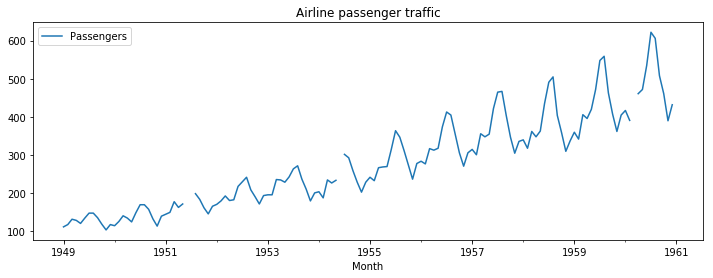

In [191]:
#Plot time series data:
data.plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Airline passenger traffic')
plt.show(block=False)

We can see that there are some missing values in the data.
we need to replace the missing data, using some imputation techinues like meadian or mean(doesnt consider temporal value)
1. Some other techniques are : Last observation carry forward (Naive, but captures the trend atleast)
2. Linear interpolation: Everytime we have missing value, Draw a straight line between the missing left and right points( trend gets captured,but seasonality might not)
3. Seasonality linear interpolation: 1956 March can be average of 1954 March and 1957 March. This can be used as imputation which takes care of trend and Seasonality into consideration.


## Missing value treatement

In [192]:
#Mean Imputation
data  = data.assign(Passengers_Mean_Imputation = data.Passengers.fillna(data.Passengers.mean()))

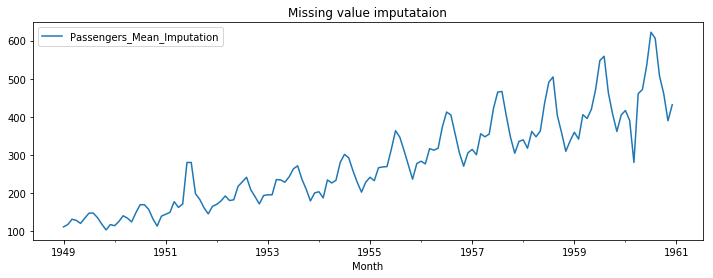

In [193]:
#Plot time series data for the mean imputation:
data[['Passengers_Mean_Imputation']].plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Missing value imputataion')
plt.show(block=False)

Observation: 
1. If we see in the year of 1952, the imputation is with mean and way above the values of passengers present at that point of time (over estimation).
2. In the year of 1960's we can see the imputaion of mean caused severe under estimation of the passengers


## Linear Interpolation

In [194]:
data = data.assign(Passengers_Linear_Interpolation = data.Passengers.interpolate(method ='linear'))

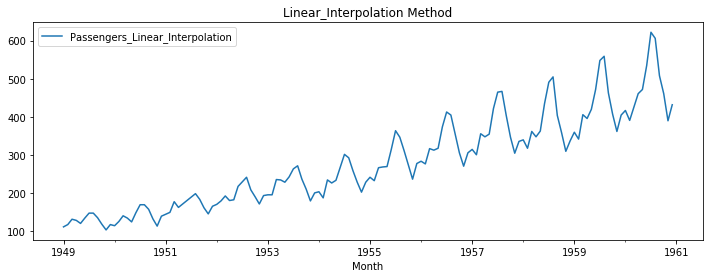

In [195]:
#Plot time series data for linear interpolation:
data[['Passengers_Linear_Interpolation']].plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Linear_Interpolation Method')
plt.show(block=False)

Observations:
1. As this technique takes the avg of left and right of the missing obs, and we can see that the trend gettting captured
2. So we can use the linear interpolation technique to replace the missing values

In [196]:
data['Passengers'] = data['Passengers_Linear_Interpolation']

## Outlier Detection

### Box plot and inter quartile range

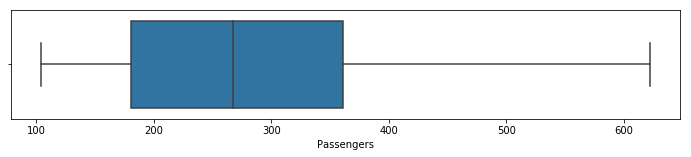

In [197]:
import seaborn as sns
fig = plt.subplots(figsize = (12,2))
ax = sns.boxplot(x = data['Passengers'], whis = 1.5)

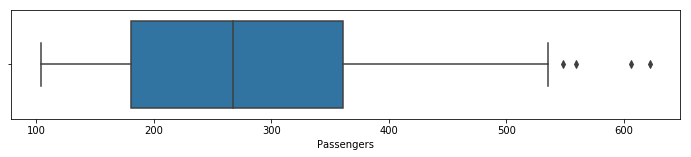

In [198]:
import seaborn as sns
fig = plt.subplots(figsize = (12,2))
ax = sns.boxplot(x = data['Passengers'], whis = 1)

As we can see that thesdata points which were identified as outliers in the whis  = 1 scenario are not outlier but the healthy seasonality indexed points as per the time series plot of the data.
    So we can say that there are no outliers as per this boz plot methods

### Histogram plot

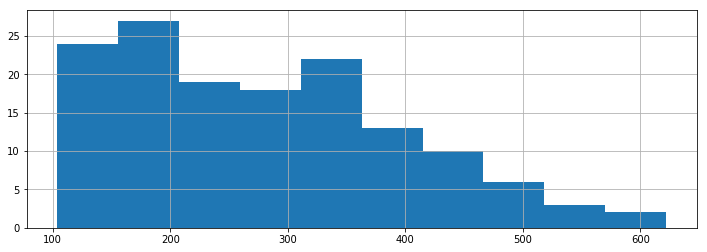

In [199]:
fig = data.Passengers.hist(figsize = (12,4))

Here also we can see that there is no break in the distribution of the data , so as per this method also we can conclude that there are no outliers in this column

## Time series decomposition

#### Additive seasonal decompostion

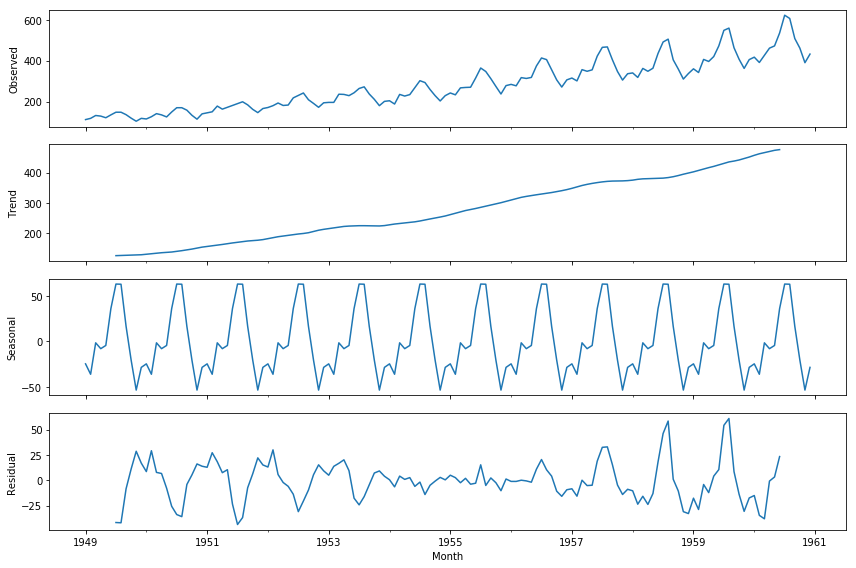

In [200]:
from pylab import rcParams
# will suse extensively 
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
#tsa means timeseriesanalysis
decompostion = sm.tsa.seasonal_decompose(data.Passengers, model = 'additive')
fig = decompostion.plot()
plt.show()

Observations:
As we can see when we decomposed the timeseries data into trend, seasonality and residual.
1. Trend: Is it increasing or decreasing?
2. Seasional: We can see if the data is having any seasonal effects of repeting the data pattern
3. Residual: After removing the trend and seasonality we are left with this, even then we can see that there is some sort of seasonlity being observed in the residual.

### Multiplicative Seasional Decomposition

In [201]:
decomposition2 = sm.tsa.seasonal_decompose(data.Passengers, model ='multiplicative')

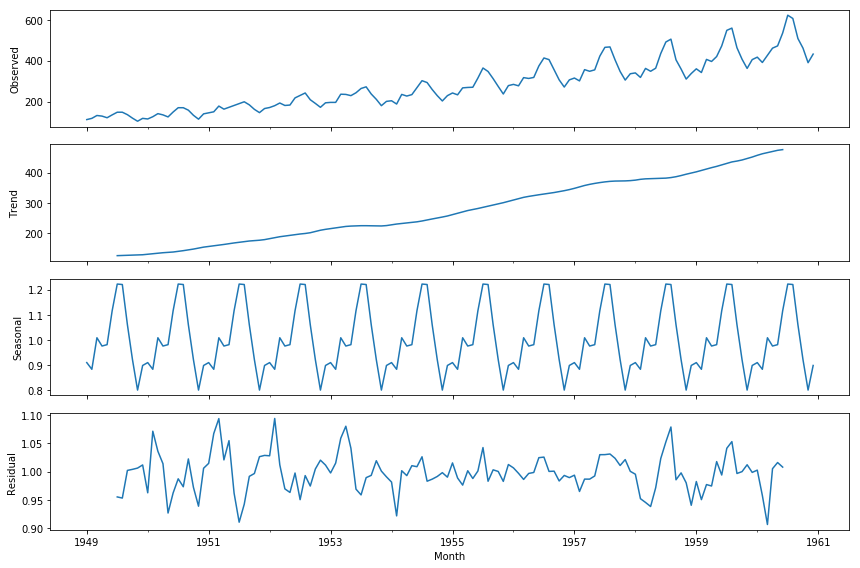

In [202]:
fig = decomposition2.plot()
plt.show()

### Build and evaluate Time Series Forecast

In [203]:
# Splitting the dataset into train and test datasets

In [204]:
# first 120 rows
train_len = 120
train = data[0:train_len]
test = data[train_len:]

### Naive Method

In [205]:
y_hat_naive = test.copy()

In [206]:
#Taking the last observation of the train dataset and getting it as the forecast for the rest of the test dataset
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [207]:
y_hat_naive['naive_forecast']

Month
1959-01-01    337.0
1959-02-01    337.0
1959-03-01    337.0
1959-04-01    337.0
1959-05-01    337.0
1959-06-01    337.0
1959-07-01    337.0
1959-08-01    337.0
1959-09-01    337.0
1959-10-01    337.0
1959-11-01    337.0
1959-12-01    337.0
1960-01-01    337.0
1960-02-01    337.0
1960-03-01    337.0
1960-04-01    337.0
1960-05-01    337.0
1960-06-01    337.0
1960-07-01    337.0
1960-08-01    337.0
1960-09-01    337.0
1960-10-01    337.0
1960-11-01    337.0
1960-12-01    337.0
Name: naive_forecast, dtype: float64

### Plot train,test and forecast

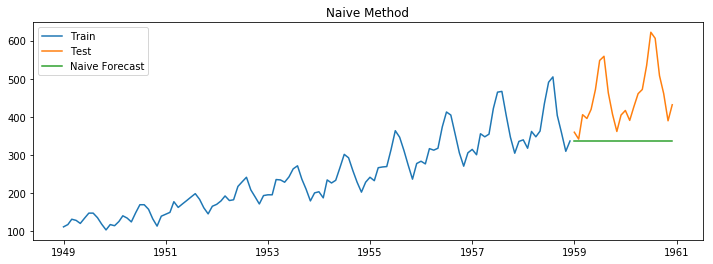

In [208]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_naive['naive_forecast'], label ='Naive Forecast')
plt.legend(loc = 'best')
plt.title('Naive Method')
plt.show()

### Caluculating the RMSE and MAPE to evaluate Forecast

In [209]:
# to caluculate RMSE: Root Mean Square Error:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_naive['naive_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)
results = pd.DataFrame({'Method':['Naive Method'],'MAPE': [mape], 'RMSE':[rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63


## Simple average method

In [210]:
y_hat_avg = test.copy()

In [211]:
#Caluculating the average of the no of passengers in the last 10 years of the train dataset and using it to forecast it for future 2 years
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

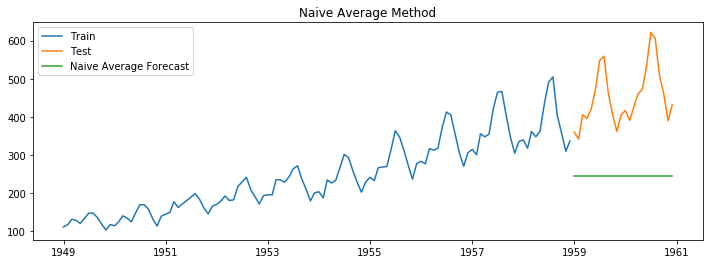

In [212]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label ='Naive Average Forecast')
plt.legend(loc = 'best')
plt.title('Naive Average Method')
plt.show()

### Caluculating the RMSE and MAPE to evaluate Forecast

In [213]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_avg['avg_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Averge Method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28


## Simple Moving Average method

In [214]:
y_hat_sma = data.copy()

In [215]:
#moving average window
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

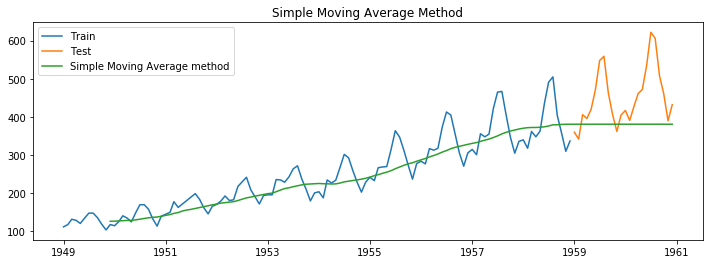

In [216]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label ='Simple Moving Average method')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method')
plt.show()

Observations:
1. We can see that the somewhat recent trend is getting inherently getting captured.
2. It is better than the simple average method


In [217]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sma['sma_forecast'][train_len:])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Moving Averge Method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54


Reducing the moving average window:

In [218]:
#moving average window
ma_window = 6
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

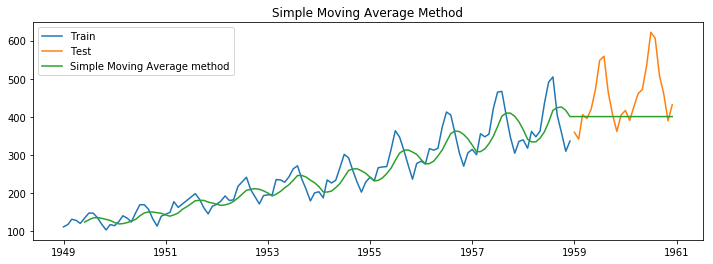

In [219]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label ='Simple Moving Average method')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method')
plt.show()

Obs: We can see that the seasonality is getting captured but with a lag of some 4-5 months.
- Lets see what would happen if we reduce the moving average window to 3 months

In [220]:
#moving average window
ma_window = 3
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

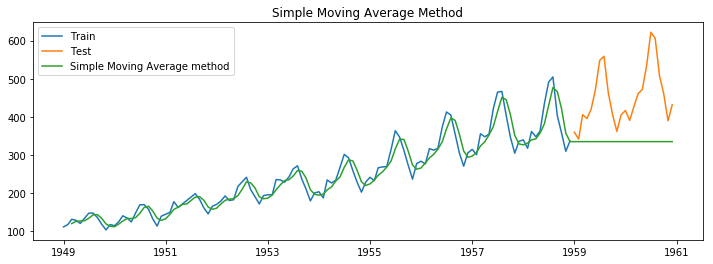

In [221]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sma['sma_forecast'], label ='Simple Moving Average method')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method')
plt.show()

This is not good absolutely because we are failing to predict seasnality as the window got smaller, look at 1960 jan value

## Simple Exponential Smooting

In [222]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#Creating a model object for simple exp smoothing
model = SimpleExpSmoothing(train['Passengers'])
#Smoothing level is the alpha parmeter, i.e the weight assigned to the latest data point
model_fit = model.fit(smoothing_level = 0.2, optimized = False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)


### Plotting train, test, forecast

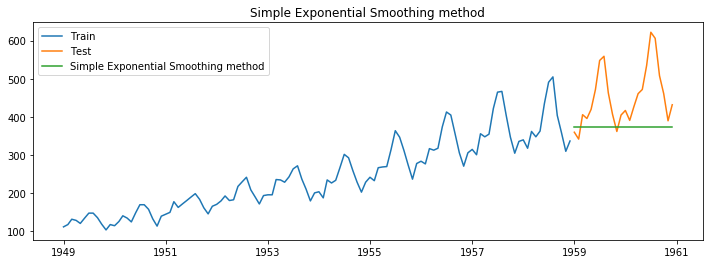

In [223]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ses['ses_forecast'], label ='Simple Exponential Smoothing method')
plt.legend(loc = 'best')
plt.title('Simple Exponential Smoothing method')
plt.show()

In [224]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ses['ses_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple Exponential Smoothing method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49


## Holts Exponential Smoothing with Trend

In [225]:
#this method helps capturing trend also in addition to the level
#level parameter is aplpha and trend parameter : beta

In [226]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#Creating a model object for exp smoothing
model = ExponentialSmoothing(np.array(train['Passengers']), seasonal_periods = 12, trend ='additive', seasonal = None )
#Smoothing level is the alpha parmeter, i.e the weight assigned to the latest data point
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized = False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


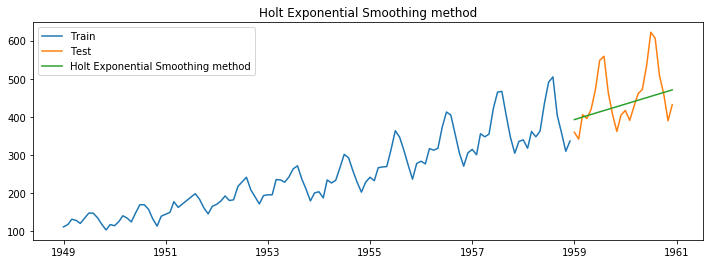

In [227]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_holt['holt_forecast'], label ='Holt Exponential Smoothing method')
plt.legend(loc = 'best')
plt.title('Holt Exponential Smoothing method')
plt.show()

Obs:
1. We got a level as well as trend being seen in the prediction

### Caluculating the RMSE and MAPE

In [228]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_holt['holt_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holts Exponential Smoothing method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Holts Exponential Smoothing method,71.94,11.11


## Holt winters' Addtivie Smoothing

In [229]:
y_hat_hwa = test.copy()

In [230]:
model = ExponentialSmoothing(np.array(train['Passengers']), seasonal_periods=12, trend = 'add', seasonal= 'add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2631578931410155, 'smoothing_slope': 0.05162963437848354, 'smoothing_seasonal': 0.7368421036673313, 'damping_slope': nan, 'initial_level': 211.55097673395076, 'initial_slope': 1.739194664563169, 'initial_seasons': array([-100.18118564,  -94.20464265,  -80.29175978,  -83.41759103,
        -91.45908923,  -77.45095857,  -64.48325265,  -64.5734032 ,
        -76.66645557,  -93.73585702, -108.67612371,  -94.50949375]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test, forecast

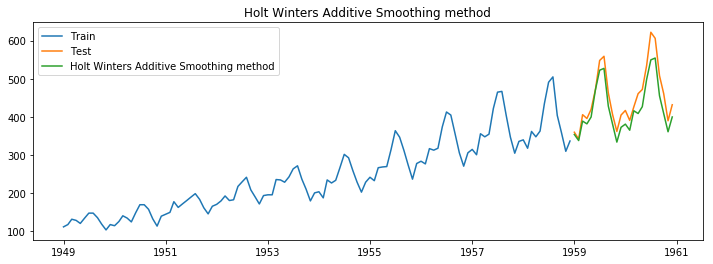

In [231]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_hwa['hwa_forecast'], label ='Holt Winters Additive Smoothing method')
plt.legend(loc = 'best')
plt.title('Holt Winters Additive Smoothing method')
plt.show()

### Caluculating the RMSE and MAPE

In [232]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_hwa['hwa_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hwa_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holts Winters Additive Smoothing method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Holts Exponential Smoothing method,71.94,11.11
0,Holts Winters Additive Smoothing method,35.10,6.53


## Holt winters' Multiplicative Smoothing

In [233]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.array(train['Passengers']), seasonal_periods=12, trend = 'add', seasonal= 'mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.38562417707363594, 'smoothing_slope': 0.035296547303939975, 'smoothing_seasonal': 0.6143757883755401, 'damping_slope': nan, 'initial_level': 212.39836999762034, 'initial_slope': 1.11064391632251, 'initial_seasons': array([0.5184742 , 0.54680406, 0.60373277, 0.57048068, 0.52106405,
       0.5732235 , 0.62846481, 0.62610082, 0.57036018, 0.4951661 ,
       0.43972748, 0.51400311]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test, forecast

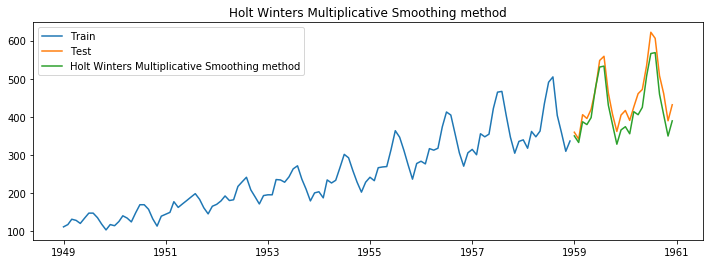

In [234]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_hwm['hwm_forecast'], label ='Holt Winters Multiplicative Smoothing method')
plt.legend(loc = 'best')
plt.title('Holt Winters Multiplicative Smoothing method')
plt.show()

### Caluculating the RMSE and MAPE

In [235]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_hwm['hwm_forecast'])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hwm_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holts Winters Multiplicative Smoothing method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Holts Exponential Smoothing method,71.94,11.11
0,Holts Winters Additive Smoothing method,35.10,6.53
0,Holts Winters Multiplicative Smoothing method,34.80,6.90


## Auto Regressive Methods

### Stationary vs. Non-stationary Time series

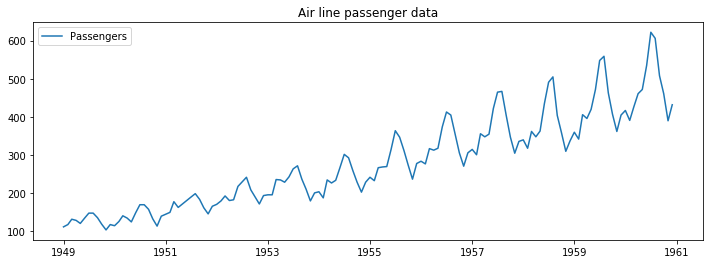

In [236]:
# Plotting Timeseries data
plt.figure(figsize = (12,4))
plt.plot(data['Passengers'], label = 'Passengers')
plt.legend(loc = 'best')
plt.title('Air line passenger data')
plt.show()

Observations:
1. Is it stationary? Visually not stationary,
To check if this is stationary or not we can perform ADF Test


## Augemented Dickey- Fuller (ADF) test

In [237]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])

print('ADF statistic: %f' % adf_test[0])
print('Critical Value @ 0.05: %.2f' %adf_test[4]['5%'])
print('p-value %f' % adf_test[1])

ADF statistic: 0.894609
Critical Value @ 0.05: -2.88
p-value 0.993020


In [238]:
adf_test

(0.8946087940823843,
 0.9930195647605924,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 993.7736365973918)

### Note: Augmented Dickey-Fuller (ADF) Test 
- Null Hypothesis(H0) : The series is not stationary. p-value >0.05
- Alternate Hypothesis (H1) : The series is stationary. p-value <=0.05


The p-value is not less than 0.05, so we can say that the series is not stataionary

## KPSS Test

In [239]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Passengers'])

print('KPSS statistic: %f' %kpss_test[0])
print('Crtical Value @ 0.05: %.2f' %kpss_test[3]['5%'])
print('p-value %f' %kpss_test[1])

KPSS statistic: 1.052050
Crtical Value @ 0.05: 0.46
p-value 0.010000


In [240]:
kpss_test

(1.0520501504573105,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

### Note: Kwaitowski- Phillips- Schmidt-Shin (KPSS) Test
- Null Hypothesis(H0) : The series is stationary. p-value >0.05
- Alternate Hypothesis (H1) : The series is not stationary. p-value <=0.05

## Box Cox Transofrmation
- To make the varience constant in Time series

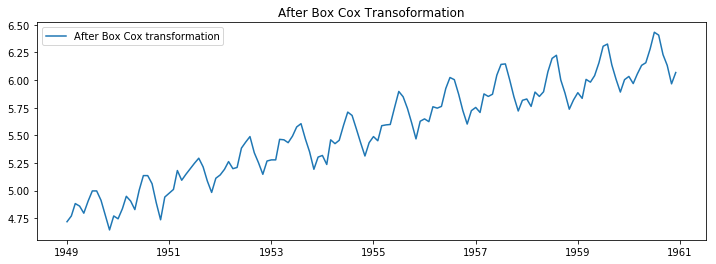

In [241]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda = 0), index = data.index)

plt.figure(figsize = (12,4))
plt.plot(data_boxcox, label = 'After Box Cox transformation')
plt.legend(loc = 'best')
plt.title('After Box Cox Transoformation')
plt.show()

## Differencing
- Removes the Trend and Seasonality in a time series
- Is performed by subracting the previous observation from the current observation

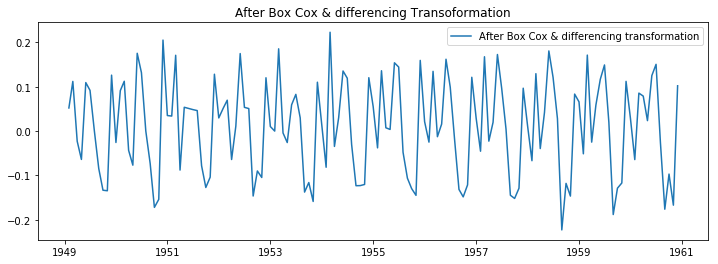

In [242]:
data_boxcox_diff = pd.Series(data_boxcox-data_boxcox.shift(), index = data.index)
data_boxcox_diff.dropna(inplace = True)

plt.figure(figsize = (12,4))
plt.plot(data_boxcox_diff, label = 'After Box Cox & differencing transformation')
plt.legend(loc = 'best')
plt.title('After Box Cox & differencing Transoformation')
plt.show()

Looks like it is a more visually stationary
Lets perform the formal tests to understand whether the transoformations made it a stationary

In [243]:
adf_test = adfuller(data_boxcox_diff)

print('ADF statistic: %f' % adf_test[0])
print('Critical Value @ 0.05: %.2f' %adf_test[4]['5%'])
print('p-value %f' % adf_test[1])

ADF statistic: -3.290114
Critical Value @ 0.05: -2.88
p-value 0.015326


ADF-statistic is < Critical Value at 0.05
and p-value is < 0.05

In [244]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS statistic: %f' %kpss_test[0])
print('Crtical Value @ 0.05: %.2f' %kpss_test[3]['5%'])
print('p-value %f' %kpss_test[1])

KPSS statistic: 0.101871
Crtical Value @ 0.05: 0.46
p-value 0.100000


ADF-statistic is < Critical Value at 0.05 and p-value is > 0.05
So we can say that the new series is a stationary
- we can build an auto regressive model on this stationary data now

## Auto Correlation Function Plot
- To understand the Correlation of the series with its lagged series

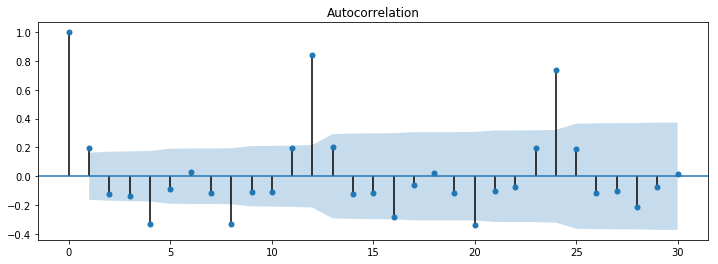

In [245]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (12,4))
plot_acf(data_boxcox_diff, ax= plt.gca(), lags= 30)
plt.show()

Obs: 
1. How our 1st lag, 4th lag and 12 th lags are highly correltaed

## Partial Autocorrelation plot (PACF)

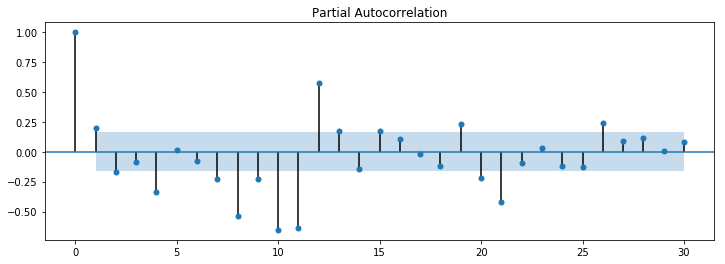

In [246]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize = (12,4))
plot_pacf(data_boxcox_diff, ax= plt.gca(), lags= 30)
plt.show()

Obs:
The primary difference in PACF and ACF: when we see the lag4, we see the direct relationship bwtween lag 0 and lag 4, not including the lag1,2,3,and 4

#### Split into training and test data sets

In [247]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
#Since we dropped the first row , sow e use train_len-1
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## Auto Regressive Model (AR)

In [248]:
from statsmodels.tsa.arima_model import ARIMA

#We will nullify the IMA parameters in ARIMA model function
model = ARIMA(train_data_boxcox_diff, order = (1,0,0))
model_fit = model.fit()
print(model_fit.params)

const      0.009477
ar.L1.y    0.183116
dtype: float64


### Recover Original Time Series forecast

In [249]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

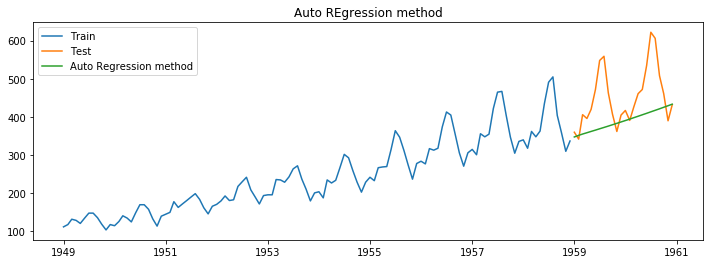

In [250]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label ='Auto Regression method')
plt.legend(loc = 'best')
plt.title('Auto REgression method')
plt.show()

### Caluculating RMSE and MAPE

In [251]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ar['ar_forecast'][test.index.min():])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ar['ar_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Auto Regression method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Holts Exponential Smoothing method,71.94,11.11
0,Holts Winters Additive Smoothing method,35.10,6.53
0,Holts Winters Multiplicative Smoothing method,34.80,6.90
0,Auto Regression method,93.39,13.77


## Moving Average (MA) Method

In [252]:
#We will nullify the ARI parameters in ARIMA model function
model = ARIMA(train_data_boxcox_diff, order = (0,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.009538
ma.L1.y    0.266103
dtype: float64


### Recovering the Original time series forecast

In [253]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

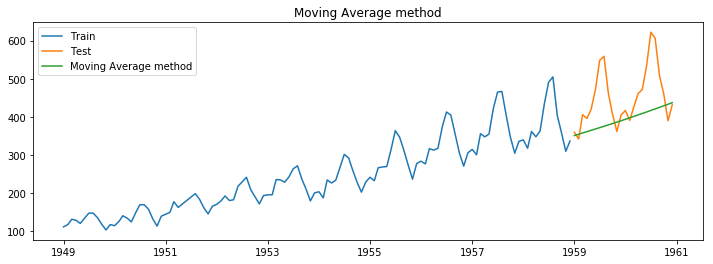

In [254]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label ='Moving Average method')
plt.legend(loc = 'best')
plt.title('Moving Average method')
plt.show()

In [255]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ma['ma_forecast'][test.index.min():])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['Moving Average method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Holts Exponential Smoothing method,71.94,11.11
0,Holts Winters Additive Smoothing method,35.10,6.53
0,Holts Winters Multiplicative Smoothing method,34.80,6.90
0,Auto Regression method,93.39,13.77
0,Moving Average method,91.21,13.39


## Auto Regressive Moving Average (ARMA) method
- uses the past observations and past error to predict the future data

In [256]:
model = ARIMA(train_data_boxcox_diff, order = (1,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.009624
ar.L1.y   -0.527115
ma.L1.y    0.798281
dtype: float64


### Recovering the original timeseries forecast

In [257]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] =y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plotting train, test, forecast series

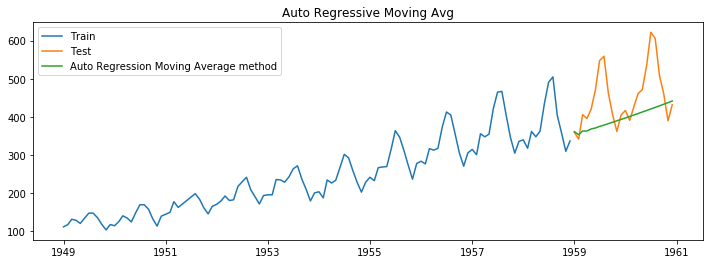

In [258]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label ='Auto Regression Moving Average method')
plt.legend(loc = 'best')
plt.title('Auto Regressive Moving Avg')
plt.show()

### RMSE and MAPE caluculations

In [259]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_arma['arma_forecast'][test.index.min():])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arma['arma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['ARMA method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Holts Exponential Smoothing method,71.94,11.11
0,Holts Winters Additive Smoothing method,35.10,6.53
0,Holts Winters Multiplicative Smoothing method,34.80,6.90
0,Auto Regression method,93.39,13.77
0,Moving Average method,91.21,13.39
0,ARMA method,88.88,12.89


## Auto Regressive Integrated Moving Average (ARIMA) Method

In [260]:
#no need to send the differenced data as ARIMA has built in capability to do differencing
model = ARIMA(train_data_boxcox, order = (1,1,1))
model_fit = model.fit()
print(model_fit.params)

const        0.009624
ar.L1.D.y   -0.527115
ma.L1.D.y    0.798281
dtype: float64


#### Recovering Original Time series forecast

In [261]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] =y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plotting the Train, Test and forecast

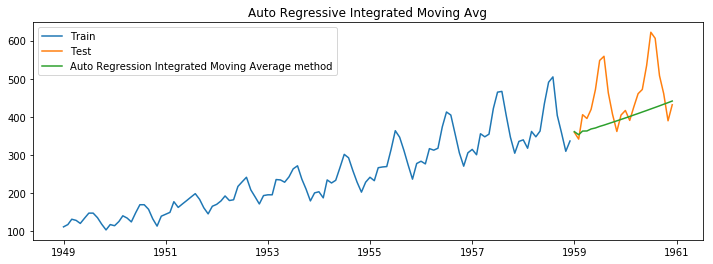

In [262]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label ='Auto Regression Integrated Moving Average method')
plt.legend(loc = 'best')
plt.title('Auto Regressive Integrated Moving Avg')
plt.show()

In [263]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_arima['arima_forecast'][test.index.min():])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['ARIMA method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Holts Exponential Smoothing method,71.94,11.11
0,Holts Winters Additive Smoothing method,35.10,6.53
0,Holts Winters Multiplicative Smoothing method,34.80,6.90
0,Auto Regression method,93.39,13.77
0,Moving Average method,91.21,13.39
0,ARMA method,88.88,12.89


Obs:
1. With the current configuration ARMA with 1 level of differencing is same as ARIMA(1,1,1) thats the reason we see the RMSE and MAPE to be same here

## Seasonal Auto Regressive Integrated Moving Average (SARIMA) Method

In [264]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#We will e configuring SARIMAX to have only sarima config
model = SARIMAX(train_data_boxcox, order = (1,1,1), seasonal_order = (1,1,1,12))
model_fit = model.fit()
print(model_fit.params)

ar.L1       0.389086
ma.L1      -0.679310
ar.S.L12   -0.041499
ma.S.L12   -0.517262
sigma2      0.001406
dtype: float64


### Recover Original Time series forecast

In [265]:
y_hat_sarima = data_boxcox_diff.copy()
#sarima gives you the forecast of the trasformed series internally , no need of transofrmation externally
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

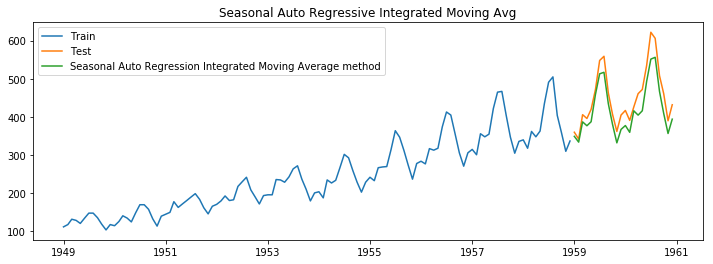

In [266]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label ='Seasonal Auto Regression Integrated Moving Average method')
plt.legend(loc = 'best')
plt.title('Seasonal Auto Regressive Integrated Moving Avg')
plt.show()

### RMSE and MAPE caluculation

In [267]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['SARIMA method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Holts Exponential Smoothing method,71.94,11.11
0,Holts Winters Additive Smoothing method,35.10,6.53
0,Holts Winters Multiplicative Smoothing method,34.80,6.90
0,Auto Regression method,93.39,13.77
0,Moving Average method,91.21,13.39
0,ARMA method,88.88,12.89


## Seasonal Auto Regressive Integrated Moving Average with external variables (SARIMAX) Method

In [268]:
promo = pd.read_csv('promotion.csv', header = None)

In [269]:
promo.columns = ['Month', 'Event']
promo['Month'] = pd.to_datetime(promo['Month'], format = '%Y-%m')
promo = promo.set_index('Month')
promo

,Event
Month,
1949-01-01,0
1949-02-01,0
1949-03-01,0
1949-04-01,0
1949-05-01,0
1949-06-01,0
1949-07-01,0
1949-08-01,0
1949-09-01,0


In [270]:
promo_train = promo[:train_len]
promo_test = promo[train_len:]

In [271]:
model = SARIMAX(train_data_boxcox, order = (1,1,1), seasonal_order= (1,1,1,12), exog = promo_train)
model_fit = model.fit()
print(model_fit.params)

Event       0.034391
ar.L1       0.481465
ma.L1      -0.744017
ar.S.L12   -0.065429
ma.S.L12   -0.556911
sigma2      0.001334
dtype: float64


### Recover Original Time series forecast

In [272]:
y_hat_sarimax = data_boxcox_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(test.index.min(), test.index.max(), exog = promo_test)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

### Plot Train, test and Forecast

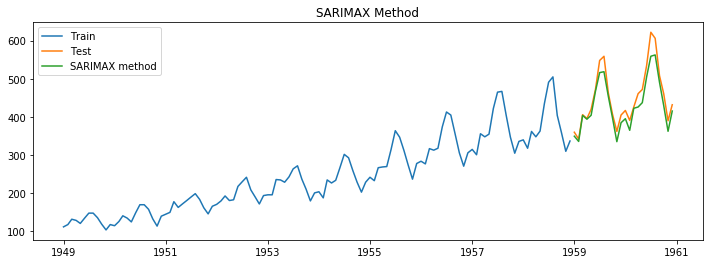

In [273]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label ='SARIMAX method')
plt.legend(loc = 'best')
plt.title('SARIMAX Method')
plt.show()

### RMSE and MAPE caluculation

In [274]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
#MAPE: Mean absoulte percentage error
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method': ['SARIMAX method'], 'RMSE':[rmse], 'MAPE': [mape]})
#concatenating it to the existing result dataframe
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Averge Method,219.69,44.28
0,Simple Moving Averge Method,103.33,15.54
0,Simple Exponential Smoothing method,107.65,16.49
0,Holts Exponential Smoothing method,71.94,11.11
0,Holts Winters Additive Smoothing method,35.10,6.53
0,Holts Winters Multiplicative Smoothing method,34.80,6.90
0,Auto Regression method,93.39,13.77
0,Moving Average method,91.21,13.39
0,ARMA method,88.88,12.89


Obs:
1. We can see that the SARIMAX Performs better than that of the hot winters Additive and Multiplicative methods also as we are capturing the Trend, seasonality and the external factors causing the same.